In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib as plt
import os

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
train_dir = r'C:\Users\kinnari\Desktop\DL projects\face_mask\Train'
validation_dir = r'C:\Users\kinnari\Desktop\DL projects\face_mask\Validation'
test_dir = r'C:\Users\kinnari\Desktop\DL projects\face_mask\Test'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=40,
                                  width_shift_range = 0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128),batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(128,128),batch_size=32,class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [14]:
from tensorflow.keras.applications import VGG19

In [15]:
conv_base = VGG19(weights = 'imagenet',include_top=False,input_shape=(128,128,3))

80142336/80134624 [==============================] - 34s 0us/step


In [17]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [18]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
conv_base.trainable = False

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 2,097,665
Non-trainable params: 20,024,384
_________________________________________________________________


In [22]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['accuracy'])

In [23]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Face_Mask_Detection_VGG19_Model-{epoch:02d}.h5")

In [25]:
model_history = model.fit(train_generator, steps_per_epoch = train_generator.samples/train_generator.batch_size,  
                                   epochs=5,
                                   validation_data=validation_generator, 
                                   validation_steps=validation_generator.samples/validation_generator.batch_size,
                                   callbacks=[checkpoint_cb])

Epoch 1/5
313/312 [==============================] - 815s 3s/step - loss: 0.2111 - accuracy: 0.9130 - val_loss: 0.0521 - val_accuracy: 0.9787
Epoch 2/5
313/312 [==============================] - 868s 3s/step - loss: 0.1180 - accuracy: 0.9562 - val_loss: 0.0325 - val_accuracy: 0.9925
Epoch 3/5
313/312 [==============================] - 740s 2s/step - loss: 0.1004 - accuracy: 0.9619 - val_loss: 0.0383 - val_accuracy: 0.9862
Epoch 4/5
313/312 [==============================] - 652s 2s/step - loss: 0.0920 - accuracy: 0.9651 - val_loss: 0.0341 - val_accuracy: 0.9900
Epoch 5/5
313/312 [==============================] - 670s 2s/step - loss: 0.0861 - accuracy: 0.9679 - val_loss: 0.0178 - val_accuracy: 0.9912


AttributeError: module 'matplotlib' has no attribute 'grid'

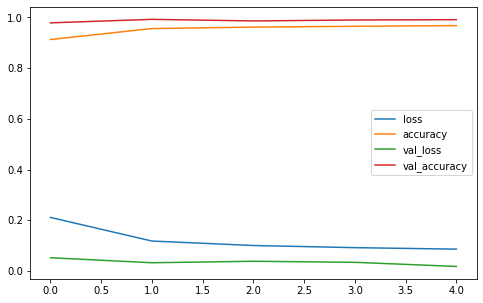

In [28]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(128,128),
                                                 batch_size=20,
                                                 class_mode='binary')

Found 992 images belonging to 2 classes.


In [30]:
model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size)

50/49 [==============================] - 57s 1s/step - loss: 0.0282 - accuracy: 0.9940


[0.0282342080026865, 0.9939516186714172]